In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget -nc https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py

--2021-12-24 18:04:17--  https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30786 (30K) [text/plain]
Saving to: ‘imageNetLabels.py’

imageNetLabels.py   100%[===================>]  30.06K  --.-KB/s    in 0.002s  

2021-12-24 18:04:17 (15.7 MB/s) - ‘imageNetLabels.py’ saved [30786/30786]



In [6]:
import tensorflow as tf  
# Display the version
print(tf.__version__)    
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input

from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split

2.7.0


In [7]:
import imageNetLabels


In [8]:
dictionary = imageNetLabels.IMAGENET_CLASSES

In [107]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
# base_model_NASNetMobile = NASNetMobile(weights="imagenet")


In [ ]:
# base_model_NASNetLarge = NASNetLarge(weights="imagenet")  ## (331, 331, 3) 

In [ ]:
# base_model_NASNetMobile.summary() ## z

In [ ]:
# i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
# core = tf.keras.applications.MobileNet()
# x = core(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])

# image = tf.image.decode_png(tf.io.read_file('file.png'))
# result = model(image)
    # for l in model.layers[:-2]:
    # #print(l)
    #   l.trainable = False

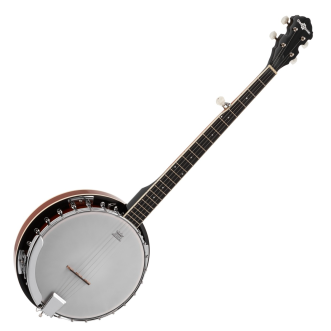

In [104]:
import cv2
img = cv2.imread('banjo.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
mobileDim = (224, 224 )
largeDim = (331 ,331)
resized = cv2.resize(img, largeDim, interpolation = cv2.INTER_AREA)
resized.shape
cv2_imshow(resized)
shape_large = (1 , 331 ,331 , 3)
shape_mobile = (1, 224 , 224, 3)

In [105]:
# mobile = (224, 224, 3)
# large  = (331, 331 ,3)
# def get_model_classif_nasnet():
#     inputs = Input(large)
#     xx = tf.cast(inputs, tf.float32)
#     xxx = tf.keras.applications.nasnet.preprocess_input(xx)
#     base_model = NASNetLarge(include_top=False, input_shape=large , weights = 'imagenet' , classes = 1000 )
#     base_model.trainable = False
#     x = base_model(xxx)
#     out3 = GlobalAveragePooling2D()(x)

#     dense = tf.keras.layers.Dense(1000, activation="softmax")
#     out = dense(out3)
#     model = Model(inputs, out)
    

#     model.summary(  )

#     model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

#     return model

In [106]:
mobile = (224, 224, 3)
large  = (331, 331 ,3)
def get_model_classif_nasnet():
    inputs = Input(large)
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)
    base_model = NASNetLarge(include_top=False, input_shape=large , weights = 'imagenet' , classes = 1000 )
    base_model.trainable = False
    x = base_model(xxx)
    out3 = GlobalAveragePooling2D()(x)

    dense = tf.keras.layers.Dense(1000, activation="relu")
    out2 = dense(out3)
    dense = tf.keras.layers.Dense(500, activation="relu")
    out1 = dense(out2)
    dense = tf.keras.layers.Dense(100, activation="relu")
    out0 = dense(out1)
    dense = tf.keras.layers.Dense(2, activation="softmax")
    out = dense(out0)
    model = Model(inputs, out)
    

    model.summary(  )

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

    return model

In [98]:
model = get_model_classif_nasnet()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 331, 331, 3)]     0         
                                                                 
 tf.cast_14 (TFOpLambda)     (None, 331, 331, 3)       0         
                                                                 
 tf.math.truediv_14 (TFOpLam  (None, 331, 331, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_14 (TFOpLa  (None, 331, 331, 3)      0         
 mbda)                                                           
                                                                 
 NASNet (Functional)         (None, 11, 11, 4032)      84916818  
                                                                 
 global_average_pooling2d_9   (None, 4032)             0  

In [99]:
in_img = np.reshape( resized , shape_large)
arr = model.predict(in_img)

In [101]:
tf.keras.applications.nasnet.decode_predictions(
    arr, top=5 )

[[('n04141327', 'scabbard', 0.0018453144),
  ('n02098105', 'soft-coated_wheaten_terrier', 0.0017422823),
  ('n02443484', 'black-footed_ferret', 0.0017146121),
  ('n03776460', 'mobile_home', 0.0017019999),
  ('n02099712', 'Labrador_retriever', 0.0016655427)]]

In [60]:
# model.layers[-1].trainable = False
y_book = 309
# y_book_hot = tf.keras.utils.to_categorical(y_book, num_classes=1000, dtype='float32')
# y_book_hot = np.reshape(y_book_hot , (1,1000))
y_book_hot = [1]

In [27]:
# model.fit_generator(train_generator,steps_per_epoch=5176//128,validation_data=valid_generator,validation_steps=1293//128,epochs=2)

In [25]:
mobile = (224, 224, 3)
large  = (331, 331 ,3)
def get_model_classif_nasnet_extended():
    inputs = Input(large)
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)
    base_model = NASNetLarge(include_top=False, input_shape=large , weights = 'imagenet' )
    base_model.traainable = False
    x = base_model(xxx)
    out3 = GlobalAveragePooling2D()(x)
    # out2 = GlobalAveragePooling2D()(x)
    # out3 = Flatten()(gmp)
    # out = Concatenate(axis=-1)([out1, out2, out3])
    out2 = Dense(16, activation=tf.keras.activations.relu, name="3_")(out3)
    out1 = Dropout(0.5)(out2)
    out = Dense(1, activation=tf.keras.activations.softmax, name="1_")(out1)

    model = Model(inputs, out)

    # for l in model.layers[:-2]:
    # #print(l)
    #   l.trainable = False
    model.summary(  )

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

    return model

In [30]:
BS=32
EPOCHS = 20
h5_path = "transferred_model.h5"
# augmented = np.empty((100 , 224 , 224 , 3))
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.05,
	width_shift_range=0.2, height_shift_range=0.1, shear_range=0.15,
	horizontal_flip=True,  fill_mode="nearest")


generator = aug.flow(x_book, y_book_hot ,batch_size=BS )
history = model.fit_generator( generator,   epochs = EPOCHS  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/20
1/1 [==============================] - 43s 43s/step - loss: 0.6203 - acc: 1.0000
Epoch 2/20
1/1 [==============================] - 1s 567ms/step - loss: 0.0989 - acc: 1.0000
Epoch 3/20
1/1 [==============================] - 1s 560ms/step - loss: 0.0104 - acc: 1.0000
Epoch 4/20
1/1 [==============================] - 1s 563ms/step - loss: 0.0191 - acc: 1.0000
Epoch 5/20
1/1 [==============================] - 1s 559ms/step - loss: 2.4175e-09 - acc: 1.0000
Epoch 6/20
1/1 [==============================] - 1s 577ms/step - loss: 0.1850 - acc: 1.0000
Epoch 7/20
1/1 [==============================] - 1s 560ms/step - loss: 3.5578e-10 - acc: 1.0000
Epoch 8/20
1/1 [==============================] - 1s 548ms/step - loss: 1.1250e-11 - acc: 1.0000
Epoch 9/20
1/1 [==============================] - 1s 559ms/step - loss: 3.3987e-07 - acc: 1.0000
Epoch 10/20
1/1 [==============================] - 1s 571ms/step - loss: 5.6854e-07 - acc: 1.0000
Epoch 11/20
1/1 [==============================] -

In [31]:
# np.argmax(model.predict(x_book))

0

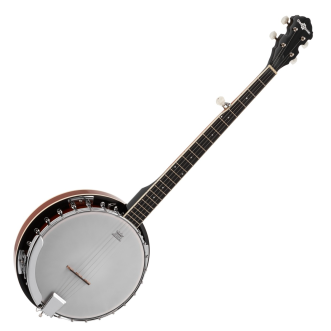

array([[1.]], dtype=float32)

In [38]:
import cv2
img = cv2.imread('banjo.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
# dim = (224, 224 )

resized = cv2.resize(img, largeDim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

resized = np.reshape( resized , shape_large)
# resized.shape
model.predict(resized)
# aaa = arr.reshape((1000,))
# aaa.argsort()[-3:][::-1]

In [34]:
model.predict(x_book)

array([[1.]], dtype=float32)

In [35]:
tf.keras.applications.nasnet.decode_predictions(
    arr, top=5 )

ValueError: ignored

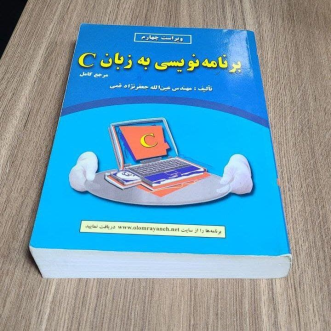

array([309, 986, 756])

In [ ]:
import cv2
img = cv2.imread('dumb.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
# dim = (224, 224 )

resized = cv2.resize(img, largeDim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

resized = np.reshape( resized , shape_large)
# resized.shape
arr = model.predict(resized)
aaa = arr.reshape((1000,))
aaa.argsort()[-3:][::-1]

In [ ]:
tf.keras.applications.nasnet.decode_predictions(
    arr, top=5 )

[[('n02206856', 'bee', 0.46665686),
  ('n12057211', "yellow_lady's_slipper", 0.0021663946),
  ('n04049303', 'rain_barrel', 0.0021155823),
  ('n04443257', 'tobacco_shop', 0.0019422517),
  ('n02009912', 'American_egret', 0.001939026)]]

banjo 420

fly 308

bee 309

barometer 426